# A k-armed Bandit Problem
by Shivangi Agarwal and Sandeep Banik | Reinforcement Learning

In a k-armed bandit problem, at every time step the user is faced with a choice of picking one action or choice from 'k' possible actions or options. Each action chosen leads to a reward which is governed by an underlying probability distribution. The objective is to maximize the expected total reward acquired over a given possible time period. 
Conventionally the k armed bandit is viewed as 'k' arms/levers on a single slot machine, and we as the user want to maximize our total reward over given 'N' possible games. The illustration of a k-armed bandit is as shown in the picture. 

<img src="RL-k-armed-bandit.png">

Note that the distribution shown is gaussian distribution. However, it can be any general distribution. The slot machine games starts with time = 1, where we play the first game, followed by the second game at time = 2 and so on till time = N. Here, the time instants represent the 'i'th game over N games. We as the user want to ideally pick the arms so as to gain maximum reward (jackpots)over N games played. 

<img src="RL-k-armed-bandit-N-steps.png">

Each action/lever of the possible 'k' levers provide an expected reward. The expected $\textit{value}$ at the time $t$ of such an action (a) is given by $q_{*}(a)$ defined as,

$q_{*}(a) = E[R_{t} | A_{t} = a]$,

where $R_{t}$ is the reward at a given time $t$ and $A_{t}$ is the action at the time $t$. However, as shown in the figures above we see that we don't know these distributions and therefore we cannot determine the expected value for a given action $a$.
Based on the games being played we can estimate the value of such actions taken which is given by $Q_{t}(a)$, and ideally we want this to be as close to $q_{*}(a)$. 

## Exploration vs Exploitation

At any given time, if we know the estimates of the set of actions, and if we choose the one which provides us the largest reward (greedy) it is said that we $\textit{exploit}$ the knowledge of the system. However, if we choose any non-greedy action then we say we explore the system. Non-greedy actions can enable us to explore and achieve a better estimates of all the set of actions. This is illustrated in the figure below. There is a trade-off between exploration and exploitation. Exploitation maybe benifical in the short run, however it might be better to explore in the long run. 

<img src="k-armed-bandit-exploitation.png">

<img src="k-armed-bandit-exploration.png">

## Action Value Methods

The range of methods which use the value of the estimates to make decisions (actions) is collectively called action value methods.
The natural way of computing the average value at the time $t$ for a given action $a$ is given as,


\begin{equation}
Q_{t}(a) = \frac{\text{Sum of the rewards when chosen the action a before the time t}}{\text{Number of times action a is chosen}}
\end{equation}

\begin{equation}
{Q_{t}(a) = \frac{\sum_{i=1}^{t-1} R_{i}.I_{A_{t=a}}}{\sum_{i=1}^{t-1}I_{A_{t=a}}}}
\end{equation}

Where $I$ is the indicator variable corresponding to 1 when the action $a$ was chosen and 0 therwise. When the numerator is zero then $Q_{t}$ takes some default value, and when it goes to infinity, $Q_{t}$ converges to $q_{*}$ by law of large numbers.

After estimating Q the greedy action is given as,
\begin{equation}
A_{t} = arg \max_{a} \ Q_{t}(a)
\end{equation}

This greedy action exploits the system from the learned estimates. 
An alternative of the greedy action is to choose a random action once in a while with a probability of $\epsilon$ such methods are called $\epsilon$-greedy methods.

## Incremental Implementation

The esimtates $Q$ at any given times step $n$ is given by,

$\begin{align}
Q_{n+1} & = \frac{1}{n}\sum_{i=1}^{n}R_{i} \\
& = \frac{1}{n} \left \{ R_{n} + \sum_{i=1}^{n-1}R_{i} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + (n-1)\frac{1}{n-1}\sum_{i=1}^{n-1}R_{i} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + (n-1)Q_{n} \right \} \\
& = \frac{1}{n} \left \{ R_{n} + nQ_{n} - Q_{n} \right \} \\
& = Q_{n} + \frac{1}{n} \left \{ R_{n} - Q_{n} \right \} \\
\end{align}$

$\begin{align}
\text{NewEstimate} = \text{OldEstimate} + \text{StepSize}\left \{\text{Target} - \text{OldEstimate} \right \}
\end{align}$


## Pseudo Algorithm

Let $N(a)$ be the number of times the action $a$ was chosen.

Initialization: For all the set of actions i.e., $a=1$ to $k$,

$Q(a) \leftarrow 0$
$N(a) \leftarrow 0$

$\text{Loop forver:}$

$\quad \text{action probability} \leftarrow \text{sample from [0,1)} \\ 
\quad A = \begin{cases} arg \max_{a} Q_{a} \quad \text{if action probability} \geq \epsilon \\ \text{random action} \quad \text{otherwise} \end{cases} \\
\quad R \leftarrow \textit{bandit(A)}\\
\quad N(A) \leftarrow N(A) + 1\\
\quad Q(A) \leftarrow Q(A) + \frac{1}{n}[R(A) - Q(A)]$

Here, the bandit refer to the process/machine which takes in the action and gives the reward. For practial prupose the loop is terminated after convergence is achieved. 

# The 10-armed bandit

To provide a working code of the above theory, we test the algorithm in a 10 armed bandit condition. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import math
from math import *

In [2]:
n = 10
t = 1000
epsilon = 0.1
epsilon1 = 0.0

bandit_number = 20

q = np.zeros((bandit_number,n))
q1 = np.full((bandit_number,n),5)
N = np.zeros((bandit_number,n))
N1 = np.zeros((bandit_number,n))
a_opt = np.zeros((bandit_number,n))

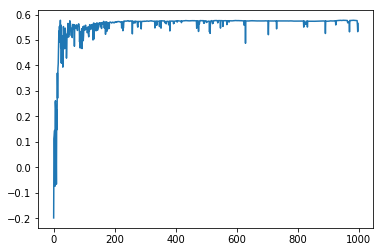

In [3]:
bandit_m1 = np.random.normal(loc=0,scale=1,size=(bandit_number,n))
#bandit_m1 = np.random.randint(1,10,size=(n,1))

def bandit(a,ids):
    
    R = np.random.normal(loc=bandit_m1[ids,a],scale=1,size=1)

    return R
cum_reward = []
cum_action  = []

opt_act = []


for episode in range(1, t):
    local_reward = 0.0
    action_history = 0.0
    upper_rewards = 0.0
    for machine in range(1,bandit_number):
        #pdb.set_trace()
        p = np.random.rand()
        if p <= epsilon:
            a =  np.random.randint(1,high=n)
        else:
            a = np.argmax(q[machine,:])
        rewards = bandit(a,machine)
        
        N[machine,a] = N[machine,a] +1
        q[machine,a] = q[machine,a] + (1/N[machine,a])*(rewards-q[machine,a])
        a_opt[machine,:] = np.argmax(q[machine,:])
        
        local_reward += rewards
        action_history += (q[machine,a])/(np.max(bandit_m1[machine,:])+1)

        
    cum_reward.append(local_reward/bandit_number)
    opt_act.append(action_history/bandit_number)

    

#%%upper confidence bound action selection
c = 2.0
a_upper = np.zeros((bandit_number,n))

q_ucb = np.zeros((bandit_number,n))
N_ucb = np.zeros((bandit_number,n))

reward_ucb = []
reward_ucb.append(0)

cum_reward1 = []
upper_action = []

for ep_ucb in range(1,t):
    lc_reward_ucb = 0.0
    opt_a_ucb = 0.0
    for mcb in range(1,bandit_number):
        
        a_upper = np.argmax(q_ucb[mcb,:] + c*(np.sqrt(math.log(ep_ucb+1))/(N_ucb[mcb,:]+1)))
        reward_ucb = bandit(a_upper,mcb)
        
        
        N_ucb[mcb,a_upper] = N_ucb[mcb,a_upper] + 1
        q_ucb[mcb,a_upper] = q_ucb[mcb,a_upper] + (1/N_ucb[mcb,a_upper])*(reward_ucb-q_ucb[mcb,a_upper])
        
        
        
        lc_reward_ucb +=reward_ucb
        opt_a_ucb += (q_ucb[mcb,a_upper])/(np.max(bandit_m1[mcb,:])+1)
        
    cum_reward1.append(lc_reward_ucb/bandit_number)
    upper_action.append(opt_a_ucb/bandit_number)
    
    #reward_ep.append(cum_reward/(t+1))
    
#%%plot graphs
#total_rewards = np.array(total_rewards)/(n*t)
#plt.plot(cum_reward,'r',label = 'Epsilon greedy')
#plt.plot(cum_reward1,'g',label = 'optimistic')
#plt.plot(opt_act)
plt.plot(upper_action)
#plt.legend()

In [5]:
ep_ucb

831